In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Fish.csv")

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
df.insert(0, 'ID', range(1, 1 + len(df)))
df.set_index("ID",inplace=True)

In [5]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
ID,,,,,,,
1,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
2,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
3,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
4,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
5,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
155,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
156,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
157,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 1 to 159
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.9+ KB


In [7]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [8]:
# null value in our dataframe 
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [9]:
fish_num=df.select_dtypes(['int64','float64'])

In [10]:
fish_num

,Weight,Length1,Length2,Length3,Height,Width
ID,,,,,,
1,242.0,23.2,25.4,30.0,11.5200,4.0200
2,290.0,24.0,26.3,31.2,12.4800,4.3056
3,340.0,23.9,26.5,31.1,12.3778,4.6961
4,363.0,26.3,29.0,33.5,12.7300,4.4555
5,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
155,12.2,11.5,12.2,13.4,2.0904,1.3936
156,13.4,11.7,12.4,13.5,2.4300,1.2690
157,12.2,12.1,13.0,13.8,2.2770,1.2558


In [11]:
fish_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 1 to 159
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   159 non-null    float64
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 8.7 KB


In [12]:
fish_num.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In [13]:
fish_cat=df.select_dtypes(['object'])

In [14]:
fish_cat

,Species
ID,
1,Bream
2,Bream
3,Bream
4,Bream
5,Bream
...,...
155,Smelt
156,Smelt
157,Smelt


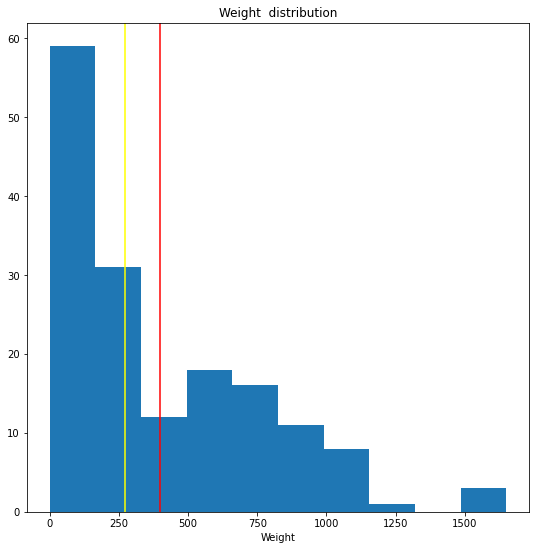

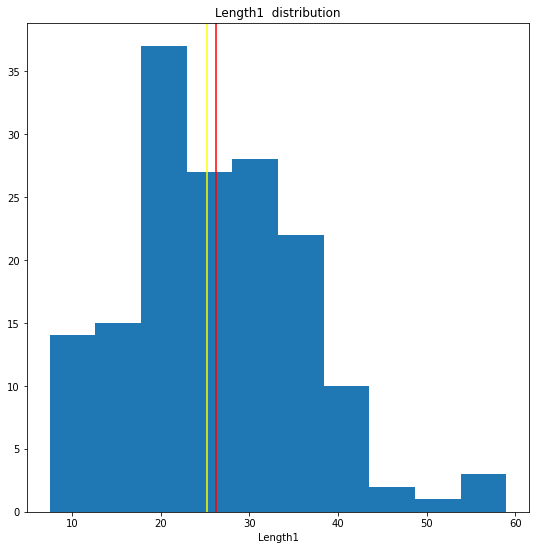

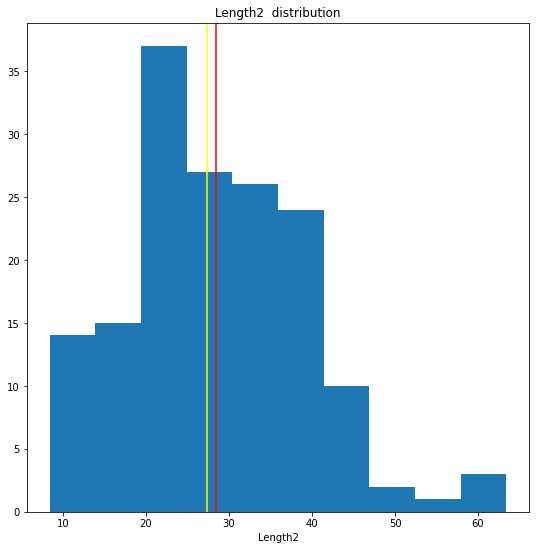

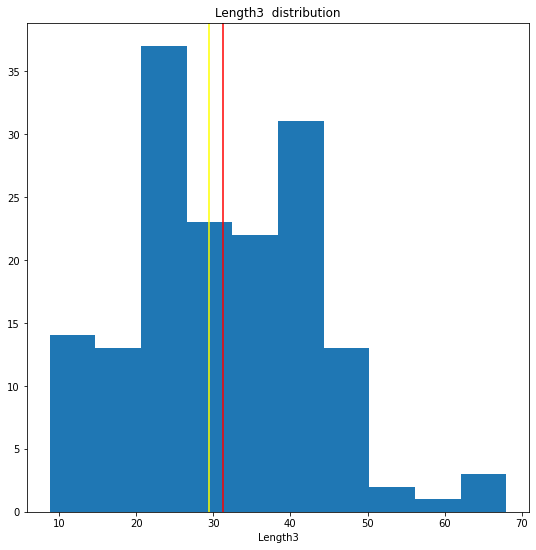

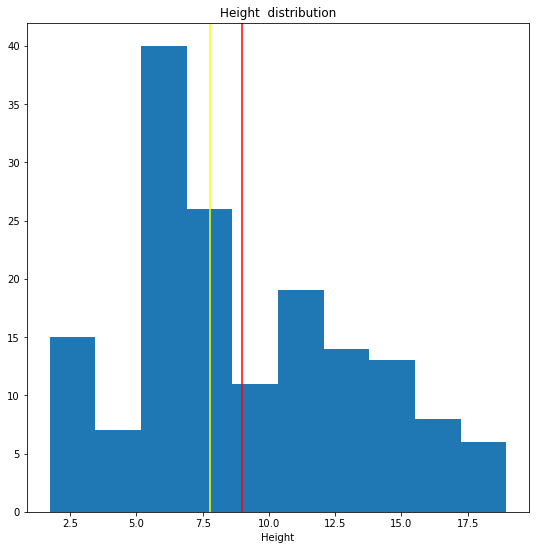

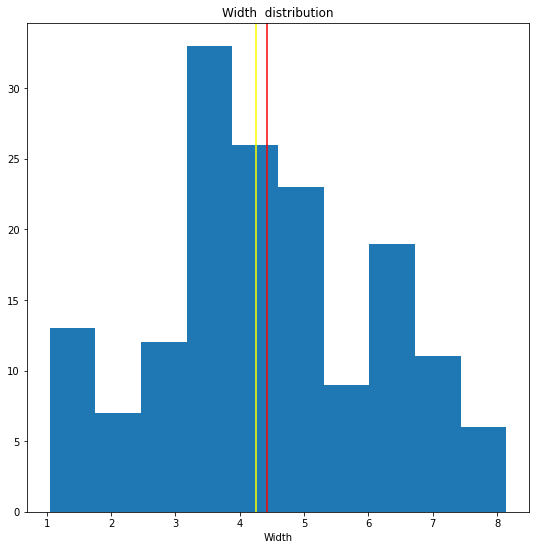

In [15]:
# univariate normal distribution data analysis 
for i in fish_num:
    plt.figure(figsize=(9,9))
    plt.hist(df[i],bins=10)
    plt.title("{}  distribution".format(i))
    plt.axvline(df[i].mean(),color="red")
    plt.axvline(df[i].median(),color="yellow")

    plt.xlabel(i)
    plt.show()

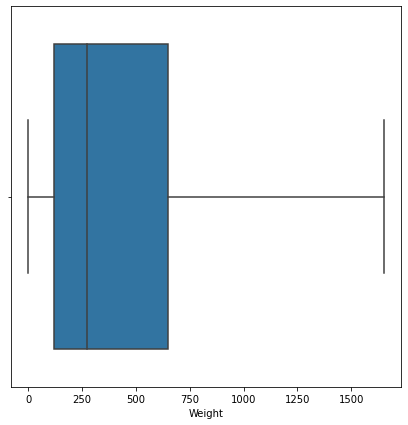

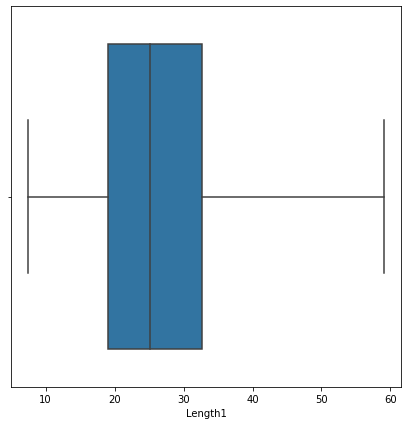

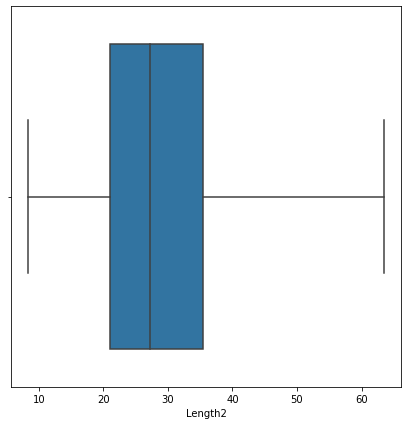

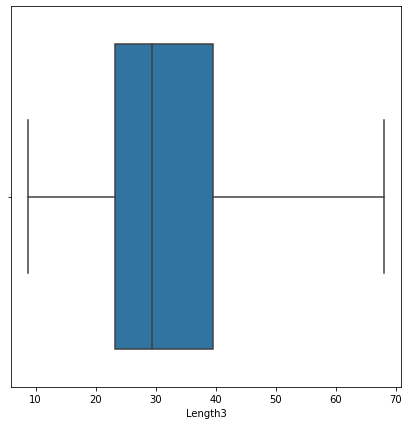

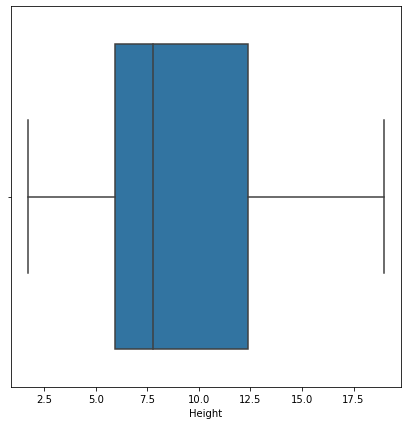

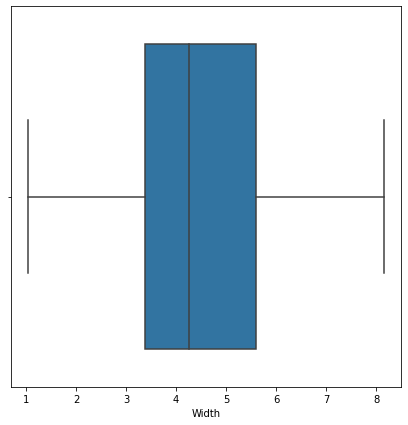

In [16]:
for i in fish_num:
    plt.figure(figsize=(7,7))
    sns.boxplot(data=fish_num,x=i,whis=3) #whis value is not gievn then whis default value is 1.5
    # upper whisker = q3+1.5*IQR
    # lower whisker = q1 - 1.5*IQR 
    # boxplot will calculate upper whisker and lower whisker by it's own and the nit will plot the box
    plt.show()

In [17]:
from scipy.stats import skew

In [18]:
# Skew = 3 * (Mean – Median) / Standard Deviation.
for i in fish_num:
    print(i,skew(fish_num[i]))

Weight 1.094003624419191
Length1 0.5829159978264967
Length2 0.534756603258803
Length3 0.38783734376005685
Height 0.3934294586710571
Width 0.004925214786310108


Weight 1.094003624419191


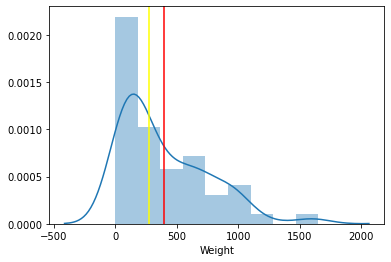

Length1 0.5829159978264967


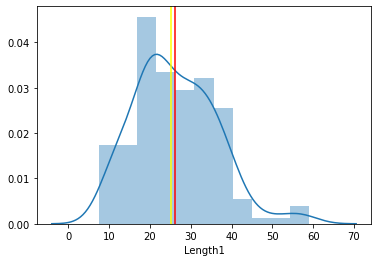

Length2 0.534756603258803


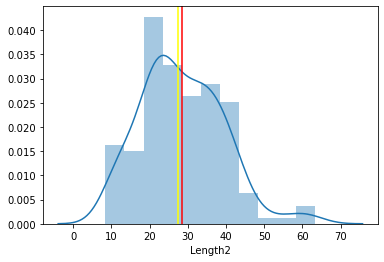

Length3 0.38783734376005685


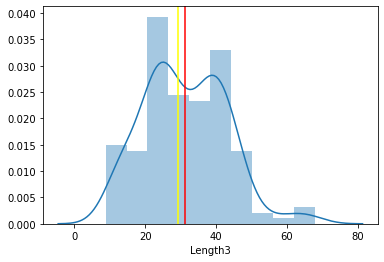

Height 0.3934294586710571


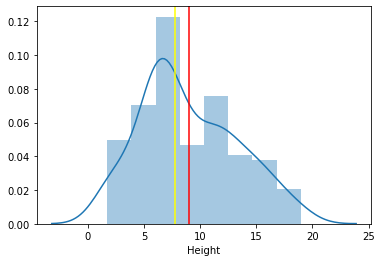

Width 0.004925214786310108


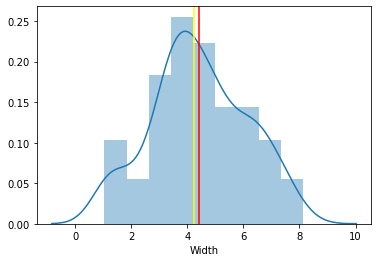

In [19]:
for col in fish_num:
    print(col,skew(fish_num[col]))
    plt.figure()
    sns.distplot(fish_num[col])
    plt.axvline(fish_num[col].mean(),color="red")
    plt.axvline(fish_num[col].median(),color="yellow")
    plt.show()

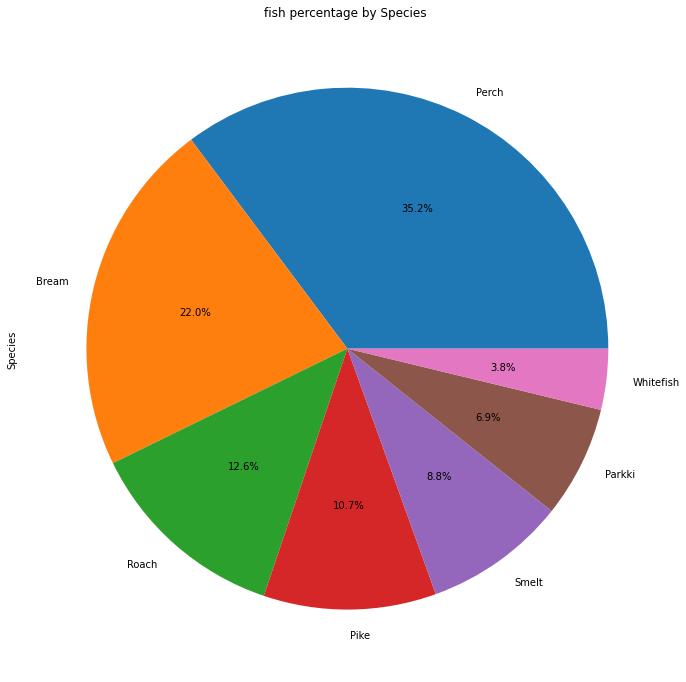

In [20]:
# graphical analysis on categorical column Neighborhood data share percentage 
# using pie plot 
plt.figure(figsize=(12,12))
fish_cat['Species'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("fish percentage by Species ")
plt.show()

In [21]:
corr=df.corr()
corr

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [22]:
from sklearn.preprocessing import LabelEncoder 

In [23]:
fish_cat

,Species
ID,
1,Bream
2,Bream
3,Bream
4,Bream
5,Bream
...,...
155,Smelt
156,Smelt
157,Smelt


In [24]:
le=LabelEncoder()
for col in fish_cat:
    fish_cat[col]=le.fit_transform(fish_cat[col])

In [25]:
fish_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 1 to 159
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Species  159 non-null    int32
dtypes: int32(1)
memory usage: 1.9 KB


In [26]:
fish_cat

,Species
ID,
1,0
2,0
3,0
4,0
5,0
...,...
155,5
156,5
157,5


In [27]:
# final df which is ready for ML algorithm we will create 
final_fish=pd.merge(fish_num,fish_cat,on="ID")

In [28]:
final_fish

,Weight,Length1,Length2,Length3,Height,Width,Species
ID,,,,,,,
1,242.0,23.2,25.4,30.0,11.5200,4.0200,0
2,290.0,24.0,26.3,31.2,12.4800,4.3056,0
3,340.0,23.9,26.5,31.1,12.3778,4.6961,0
4,363.0,26.3,29.0,33.5,12.7300,4.4555,0
5,430.0,26.5,29.0,34.0,12.4440,5.1340,0
...,...,...,...,...,...,...,...
155,12.2,11.5,12.2,13.4,2.0904,1.3936,5
156,13.4,11.7,12.4,13.5,2.4300,1.2690,5
157,12.2,12.1,13.0,13.8,2.2770,1.2558,5


In [29]:
final_fish.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 1 to 159
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   159 non-null    float64
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
 6   Species  159 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 9.3 KB


In [30]:
corr=final_fish.corr()
corr

,Weight,Length1,Length2,Length3,Height,Width,Species
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507,-0.312960
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050,-0.266696
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547,-0.283601
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520,-0.335519
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881,-0.698193
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000,-0.397578
Species,-0.312960,-0.266696,-0.283601,-0.335519,-0.698193,-0.397578,1.000000


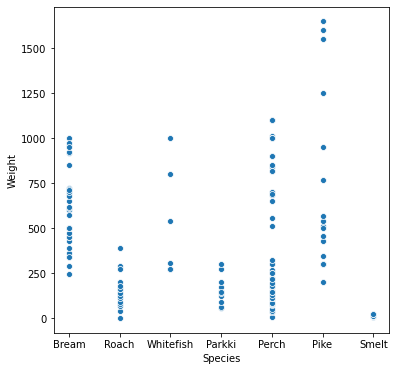

In [31]:
# graphical univariate analysis 
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x="Species",y="Weight")
plt.show()
# my data s

In [32]:
# then also i will try to make linear regression model 
x=df[['Length1','Length2','Length3','Height','Width']] # feature
y=df[['Weight']] # target 

In [33]:
# import required modules 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [34]:
# split data 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)
# split done 70% training 30% testing based 
# random_state = we instruct split algorithm to split data randomly with 1 state

In [35]:
# Model Training 
lr=LinearRegression() # object will be created
# llearning model on given data 
# use theta0+theta1x to calculate bestfit prediction line 
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
lr.coef_ # slop 

array([[ 58.50297201,   3.22702894, -36.51057731,  25.82354203,
         36.66904584]])

In [37]:
lr.intercept_ # intecept 

array([-480.16018025])

In [38]:
# now model is trained and ready to predict 
# but before we use it for prediction let's check it's accuracy 
y_pred=lr.predict(x_test)

In [39]:
y_test # x_test original   y
y_pred # prediction x_test yhat 

# MSE = sum((y-yhat)**2)/n 

array([[ 775.40145532],
       [ 135.96386999],
       [ 560.68252608],
       [ 199.61632586],
       [ 115.29420123],
       [ 612.36848916],
       [ 204.34359025],
       [ 524.89735491],
       [ 155.22179188],
       [ 258.21835784],
       [ 183.8670258 ],
       [ 195.83686773],
       [ -76.95400741],
       [ 394.90880933],
       [ 707.79845059],
       [ 191.99867878],
       [ 192.42397041],
       [ 511.40314214],
       [ 460.93085257],
       [ 316.35435999],
       [-157.40542429],
       [ -81.18129625],
       [ 289.41638746],
       [ 448.59040099],
       [ 159.16014478],
       [ 782.93362305],
       [ 584.02575169],
       [-215.45542462],
       [1126.15166182],
       [ 207.39027315],
       [ 965.94413006],
       [ 383.44572448],
       [ 754.81995014],
       [ 532.78144028],
       [ 563.92320494],
       [ 437.66826511],
       [ 218.70929069],
       [ 293.8575148 ],
       [ 892.97274898],
       [ 311.64931736],
       [ 596.71355435],
       [ 669.714

In [40]:
y_test

,Weight
ID,
30,1000.0
43,120.0
15,600.0
92,130.0
82,85.0
20,650.0
45,145.0
12,500.0
41,0.0


In [41]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [42]:
mse=mean_squared_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print(" accuracy MSE is {} ".format(mse))
print(" accuracy R2 score is {} ".format(r2score))

 accuracy MSE is 16062.711813993526 
 accuracy R2 score is 0.8640949745089503 


In [43]:
# code must be reuseable for that let's make a function 
def Model_Training(x_train,y_train,x_test,y_test):
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    r2score=r2_score(y_test,y_pred)
    print("slop => ",lr.coef_)
    print("Intercept => ",lr.intercept_)
    print("accuracy MSE is {} ".format(mse))
    print("accuracy R2 score is {} ".format(r2score))

In [44]:
x=df[['Length1','Length2','Length3','Height','Width']]
y=df[["Weight"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)
Model_Training(x_train,y_train,x_test,y_test)

slop =>  [[ 58.50297201   3.22702894 -36.51057731  25.82354203  36.66904584]]
Intercept =>  [-480.16018025]
accuracy MSE is 16062.711813993526 
accuracy R2 score is 0.8640949745089503 


# k fold using cross validation

In [45]:
from sklearn.model_selection import cross_val_score

In [47]:
lr_cross=cross_val_score(lr,x,y,cv=4) # total 4 fold it will create 

In [48]:
lr_cross

array([0.61800286, 0.79479945, 0.71556502, 0.63801273])

In [49]:
np.mean(lr_cross)

0.691595014588523